In [1]:
#!pip install pytesseract

In [1]:
import pytesseract #importing Terssarct Plugin for identify text from the 

In [2]:
print(pytesseract.__version__) 

0.3.8


In [3]:
import cv2 #pip install open-cv Python

In [4]:
print(cv2.__version__)

4.8.0


In [5]:
import matplotlib.pyplot as plt

In [6]:
#!pip install Pillow

# Let's Do Configuration 

In [7]:
#Redirecting the tesseract file Path for use the Define Libraries
#Put the correct Path of the Pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [8]:
image = cv2.imread('/Users/Asus/Documents/Atmel Studio/Spare_Dio/dio.jpg')

In [9]:
#Parameters to find the Dimention of the Images
imgH, imgW,_ = image.shape

In [10]:
image.shape

(3024, 4032, 3)

In [11]:
#Creating Boxes for the Letters in the image
imgbox=pytesseract.image_to_boxes(image)

# Identify the Characters using Image Boxes

In [18]:
#Iterative Process for Create boxes in the Image
for boxes in imgbox.splitlines():
     boxes = boxes.split(' ')
     x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
     cv2.rectangle(image, (x,imgH-y) , (w,imgH-h), (0,0,255),3)

In [11]:
#Converting to RGB image Format
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Without Using Any Filters in the Images

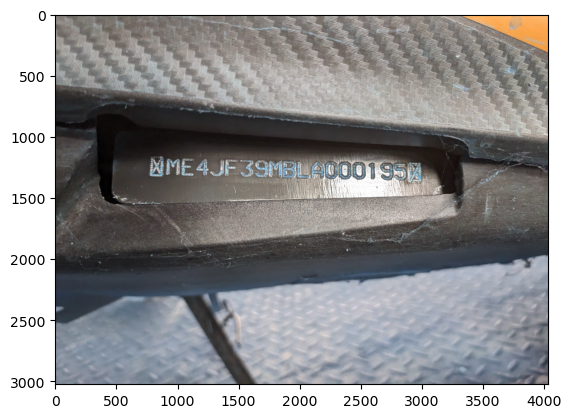

In [12]:
#image = cv2.imread('/Users/Asus/Documents/Atmel Studio/Spare.jpg')
#Displaying the Image that Addressed
plt.imshow(image)

In [14]:
#Show Casing the image dimention
image.shape

(3024, 4032, 3)

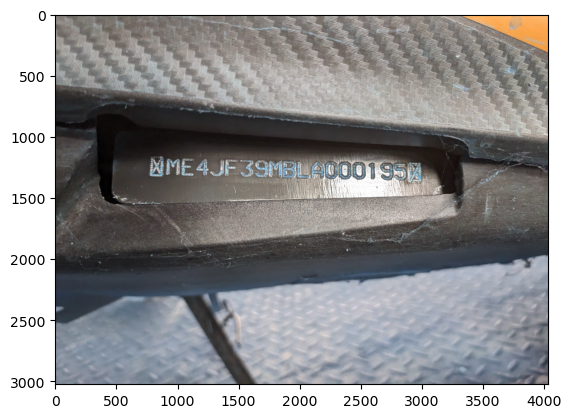

In [15]:
#Iterative Process for Create boxes in the Image
for boxes in imgbox.splitlines():
     boxes = boxes.split(' ')
     x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
     cv2.rectangle(image, (x,imgH-y) , (w,imgH-h), (0,0,255),3)
        
plt.imshow(image) #Default Shows cv2=> In BGR

# Modify the Image using Filters and Noice Reduction

In [16]:
import cv2
import numpy as np

#image = cv2.imread('/Users/Asus/Documents/Atmel Studio/noun.jpg')

#Run the Program each time for text recaputuring process form the Image

# OpenCv function to get grayscale image
def get_grayscale(image):                    
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #This Function in OpenCV2 Provides to get GrayScale 

# noise removal in Given Image
def remove_noise(image):
    return cv2.medianBlur(image,5) #Removing Noice in the Picture is Way more Important 
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotation = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotation

#template matching
#def match_template(image, template):
  #return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [22]:
from PIL import Image
    #print("Image rotated 90 degrees clockwise and saved as 'rotated_image.jpg'.")

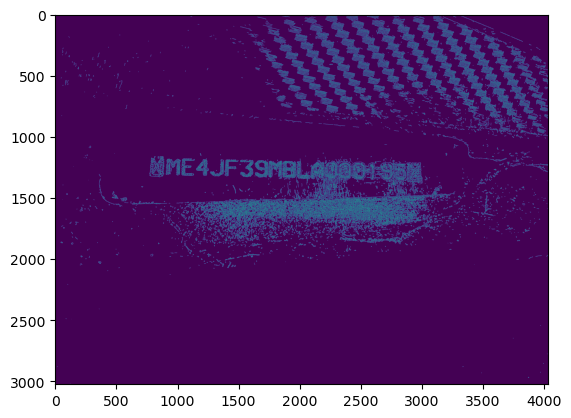

In [17]:
image = cv2.imread('/Users/Asus/Documents/Atmel Studio/Spare_Dio/dio.jpg')

gray = get_grayscale(image) #Converting Image to a GrayScale Image
thresh = thresholding(gray) #Binary Thresholding Apply for the GrayScale Image
opening = opening(gray)
canny = canny(gray)  #Canny Filtering used for the GrayScale Image
#deskew = deskew(canny)

plt.imshow(canny) 

In [19]:
converted=cv2.imwrite("/Users/Asus/Documents/Atmel Studio/Spare_Dio/dioSpare_image.jpg",canny)

#Converting image Matrix into Text Format
image_char=pytesseract.image_to_string(canny)
#print(image_char)

#Represent the Digits in the Image

#print("Digits in the Image Respectively:-")
#digit_represent = r'--oem 3 --psm 6 outputbase digits'
#print(pytesseract.image_to_string(image, config=digit_represent))

print("Characters in the Document Respectively :-")
char_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(image, config=char_config)

Characters in the Document Respectively :-


'es bee ee a a —— a Sern SS .\nc y aay z NEY Br ba | eS wm - ~ #i = = ————— = . \' =\n<c : en Bh ; Be is ot ii. Sas ; —— . ~ ‘ ee —— j ——F = — —S a °\nBe — A te. | haa? | \'¥ Bae de = { ee : FA ee SS . ——— : a at ~—.,\nee E ape Pilg: ., See tik, rare) ne gh re ie = a F ~~ a i re ae. — ™” ——= SS = h —— ~ ™.\nie Lee more - f Peep ne mh ja & : ——- ~~ tet = — ii a ee > ede ? SS _ ~ >\nad: i | eet daliciat emer ey! en = : = : — —— ie — i ——— a iS i ee oe\n& ; esas Pave... ? aaa # } ia f a pr Lay = Ni, — = .——— a — , =<, ss §-» >" *\n"eg W a = —S oe ee Se SS SS Se\n‘ a ? : M,. oe z = « _— —— = als —~Ae ae | — ee = Vis. "\n. a hagiec See. ne = Ss nts <—vs_——vuv— VS Ss a — Se oe —_\nen || ie : i i i a ees ee SS Sa >\nog |) ae SS ha i. i) a is\ngat Bia: z : — a f es = ae J ———— sae * ey) as ~*~ ~~ Sa = _—\n: % i ic c Fr fa —— i — ~~ Sa —__—s-_ SS. PSS Se * SS Sa > Sa nn\na a e : : : ——S —— = > Lo — ———S Jae SS Se: ae vi ‘ he\nae — ; : ——_ a ‘ae | — oo ———~a = || ae = eS _—— —— —— ¥> i\n? ered —

## EasyOCR Usage

In [26]:
# OCR using easyocr

#!pip install easyocr --user

  Using cached easyocr-1.7.0-py3-none-any.whl (2.9 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached torchvision-0.15.2-cp38-cp38-win_amd64.whl (1.2 MB)
  Using cached ninja-1.11.1-py2.py3-none-win_amd64.whl (313 kB)
  Using cached pyclipper-1.3.0.post4-cp38-cp38-win_amd64.whl (95 kB)
  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl (38.0 MB)
  Using cached torch-2.0.1-cp38-cp38-win_amd64.whl (172.4 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
import torch
import easyocr
import os

In [21]:
# In case you do not have GPU or your GPU has low memory, 
# you can run it in CPU mode by adding gpu = False

# reader = easyocr.Reader(['en', 'en'], gpu=False)

reader = easyocr.Reader(['en', 'en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [22]:
# Image to text using easyocr
# Output will be in list format, each item represents bounding box, text and confident level, respectively.

img_text = reader.readtext("/Users/Asus/Documents/Atmel Studio/Spare_Dio/dioSpare_image.jpg")
final_text = ""

for _, text, __ in img_text: # _ = bounding box, text = text and __ = confident level
    final_text += " "
    final_text += text
final_text

' IME Jf39hs 405'

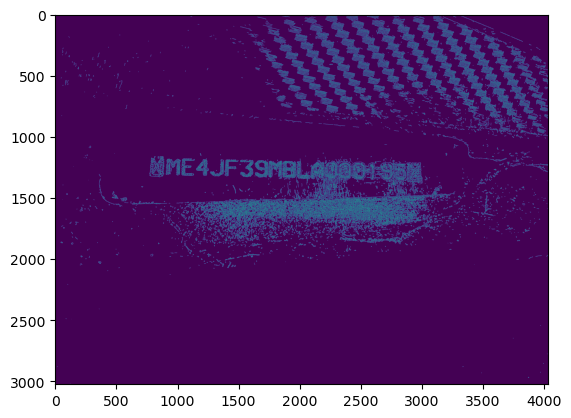

In [23]:
plt.imshow(canny) 

In [36]:
# Function to Traverse the folder

def traverse(directory):
    path, directory, files = next(os.walk(directory))
    return files

In [37]:
# Image directory and list of files

directory = "/Users/Asus/Documents/Atmel Studio/Spare_OCR"
files_list = traverse(directory)

In [46]:
# Doing OCR using GPU
# save the images text to dict

images_text = {}
for files in files_list:
    img_text = reader.readtext(directory + '/' +  files)
    final_text = ""
    for _, text, __ in img_text:
        final_text += " "
        final_text += text
    images_text[files] = final_text
    im= len(files_list)    

stag=im

In [47]:
#files_list[:stag]

['Spare.jpg', 'Spare_rotated_image.jpg']

In [50]:
#type(stag)

int

In [60]:
# For sorting the image file name

#keys = list(images_text.keys())
#print(keys)
#new_keys=len(keys)
#converted_keys = []
#for k in keys:
#    try:
#        converted_keys.append(int(k))
#    except ValueError:
#        pass


#new_keys = [int(k[2:-2]) for k in keys]
#new_keys.sort()

['Spare.jpg', 'Spare_rotated_image.jpg']
[]
